In [1]:
import tensorflow as tf

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

# 固定のテンソルを作成

In [3]:
row_dim = 2
col_dim = 5

In [4]:
zero_tsr = tf.zeros([row_dim, col_dim])

with tf.Session() as sess:
    print("%s" % sess.run(zero_tsr))

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [5]:
ones_tsr = tf.ones([row_dim, col_dim])

with tf.Session() as sess:
    print("%s" % sess.run(ones_tsr))

[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


In [6]:
# 定数で埋められたテンソルを作成
filled_tsr = tf.fill([row_dim, col_dim], 42)

with tf.Session() as sess:
    print("%s" % sess.run(filled_tsr))

[[42 42 42 42 42]
 [42 42 42 42 42]]


In [7]:
# 既存の定数からテンソルを作成する
const_tsr = tf.constant([1,2,3])

with tf.Session() as sess:
    print("%s" % sess.run(const_tsr))

[1 2 3]


In [8]:
# 既存の定数からテンソルを作成する
# 行列（2重配列）の場合
const_tsr = tf.constant([[1,2,3],[9,8,7]])

with tf.Session() as sess:
    print("%s" % sess.run(const_tsr))

[[1 2 3]
 [9 8 7]]


# 同じような形状を持つテンソルの作成

In [9]:
zeros_similar = tf.zeros_like(const_tsr)
ones_similar  = tf.ones_like(const_tsr)

# shape=(2,3) の行列が作成される
with tf.Session() as sess:
    print("zeros_similar: %s" % sess.run(zeros_similar))
    print("ones_similar : %s" % sess.run(ones_similar))

zeros_similar: [[0 0 0]
 [0 0 0]]
ones_similar : [[1 1 1]
 [1 1 1]]


# シーケンステンソルの作成

In [10]:
# 分割が少数になる場合、start と stop は float で指定する
# linear_tsr = tf.linspace(start=0, stop=1, num=3)
linear_tsr = tf.linspace(start=0.0, stop=1.0, num=3)

with tf.Session() as sess:
    print("%s" % sess.run(linear_tsr))

[ 0.   0.5  1. ]


In [11]:
# 開始点から limit まで（limitは含まない）ところまで delta 間隔で値が含まれる
integer_seq_str = tf.range(start=6, limit=15, delta=3)

with tf.Session() as sess:
    print("%s" % sess.run(integer_seq_str))

[ 6  9 12]


In [12]:
# float の場合,  float として格納される
float_seq_str = tf.range(start=6.0, limit=15, delta=3)

with tf.Session() as sess:
    print("%s" % sess.run(float_seq_str))

[  6.   9.  12.]


# ランダム値のテンソル

In [13]:
# 一様分布に基づくテンソル
randunif_tsr = tf.random_uniform([row_dim,col_dim], minval=0, maxval=1)

with tf.Session() as sess:
    print("%s" % sess.run(randunif_tsr))

[[ 0.26150084  0.72893822  0.21743333  0.02496469  0.78801644]
 [ 0.51120317  0.76764429  0.72223759  0.48551702  0.90357339]]


In [14]:
# 正規分布に基づくテンソル
randnorm_tsr = tf.random_normal([row_dim,col_dim], mean=0.0, stddev=1.0)

with tf.Session() as sess:
    print("%s" % sess.run(randunif_tsr))

[[ 0.50891101  0.64411926  0.94201386  0.82610905  0.30802953]
 [ 0.91134489  0.28517675  0.85159135  0.30066884  0.2767545 ]]


In [15]:
# 正規分布に区間を設定する
# 指定された平均から標準偏差の2倍までの正規分布から値を選ぶ
truncnorm_tsr = tf.truncated_normal([row_dim,col_dim], mean=0.0, stddev=1.0)

with tf.Session() as sess:
    print("%s" % sess.run(truncnorm_tsr))

[[-0.11137658 -0.16188642 -0.38960144  1.78575468  0.37301728]
 [-0.31619367 -0.7799964   1.97843409  0.77727425 -1.00114787]]


# それぞれの分布をグラフで確認する

/Users/atsushi/.anyenv/envs/pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


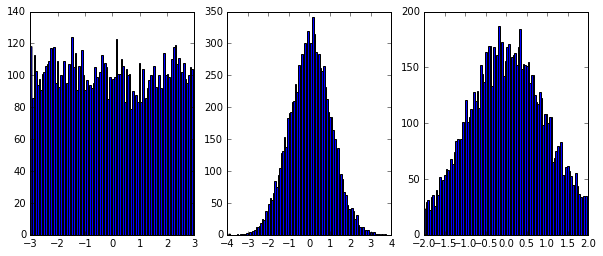

In [16]:
randunif_tsr = tf.random_uniform([10000], minval=-3, maxval=3)
randnorm_tsr = tf.random_normal([10000], mean=0.0, stddev=1.0)
truncnorm_tsr = tf.truncated_normal([10000], mean=0.0, stddev=1.0)

with tf.Session() as sess:
    fig, (axL, axC, axR) = plt.subplots(ncols=3, figsize=(10,4))
    axL.hist(sess.run(randunif_tsr), bins=100)
    axC.hist(sess.run(randnorm_tsr), bins=100)
    axR.hist(sess.run(truncnorm_tsr), bins=100)
    fig.show()